## Paired plots 

In [426]:
data = pd.read_csv('../results/pair_experiment.csv')

In [427]:
do_floor, beta = True, 1.1
#do_floor, beta = False, 1.05
data = data[(data['beta'] == beta) & (data['do_floor'] == do_floor)]

In [428]:
len(data)

300

In [429]:
data

,target_epsilon,target_delta,beta,do_floor,game_id,size_of_game,num_discard_cards,hand_p1,hand_p2,v_inf,v_1_inf,emp_sample_complexity,emp_simulation_complexity
0,0.01,0.05,1.1,True,d5a07e0d-ea9e-48cb-b9b8-16f74b2519f7,100,2,"['S5', 'D5', 'D10', 'S13', 'C14']","['S2', 'S4', 'H7', 'C12', 'D14']",0.878534,65.667062,237383,17700422
1,0.01,0.05,1.1,True,d5a07e0d-ea9e-48cb-b9b8-16f74b2519f7,100,3,"['S5', 'D5', 'D10', 'S13', 'C14']","['S2', 'S4', 'H7', 'C12', 'D14']",0.884291,69.863290,237383,18898029
2,0.01,0.05,1.1,True,7e64e9ed-1e6b-4c38-98e9-eb0972168a82,100,2,"['H3', 'C6', 'H8', 'S9', 'S10']","['D3', 'S5', 'D5', 'S6', 'S13']",0.952829,67.247314,237383,18308424
3,0.01,0.05,1.1,True,7e64e9ed-1e6b-4c38-98e9-eb0972168a82,100,3,"['H3', 'C6', 'H8', 'S9', 'S10']","['D3', 'S5', 'D5', 'S6', 'S13']",0.902850,57.964368,237383,15788295
4,0.01,0.05,1.1,True,23829fc6-1696-435d-9c6d-d6c761b613b1,100,2,"['C3', 'D4', 'D9', 'C11', 'H13']","['C5', 'S6', 'D12', 'C13', 'C14']",0.876967,74.929662,237383,20071704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.01,0.05,1.1,True,0d7f411a-59cf-44ea-ac59-ae5103e01ede,100,3,"['C4', 'D7', 'D11', 'H13', 'S14']","['C2', 'H3', 'C5', 'S8', 'H10']",0.854818,76.044265,237383,20567551
296,0.01,0.05,1.1,True,503c4b98-bcd3-4f55-ad80-330996ea45c6,100,2,"['D4', 'D9', 'D11', 'C13', 'S14']","['D6', 'C7', 'S9', 'S12', 'C14']",0.893491,66.689100,237383,17894539
297,0.01,0.05,1.1,True,503c4b98-bcd3-4f55-ad80-330996ea45c6,100,3,"['D4', 'D9', 'D11', 'C13', 'S14']","['D6', 'C7', 'S9', 'S12', 'C14']",0.865228,68.074641,237383,18299498
298,0.01,0.05,1.1,True,ba52e116-f202-433f-9d08-247290809a16,100,2,"['C2', 'D3', 'C6', 'C8', 'H9']","['H2', 'H4', 'H5', 'S9', 'S12']",0.790510,60.689636,215802,16470177


In [430]:
data.nunique()

target_epsilon                 1
target_delta                   1
beta                           1
do_floor                       1
game_id                      150
size_of_game                   1
num_discard_cards              2
hand_p1                      150
hand_p2                      150
v_inf                        261
v_1_inf                      300
emp_sample_complexity          4
emp_simulation_complexity    300
dtype: int64

In [431]:
discard_2 = data[data['num_discard_cards'] == 2]
discard_3 = data[data['num_discard_cards'] == 3]

In [432]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev * 0.5

In [433]:
min(x), min(y)

(204186, 236200.26409771392)

In [434]:
def pair_expt_plot_save(plot_stat, beta, do_floor):
    
    axis_titles = {
    'emp_sample_complexity': 'empirical sample complexity', 
    'emp_simulation_complexity': 'empirical query complexity', 
    }
    
    fig, ax = plt.subplots()
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    
    plt.tight_layout()
    plt.title(f'Paired experiment, {axis_titles[plot_stat]}. \n {len(discard_3)} games, beta = {beta}, do_floor = {do_floor}.')
    plt.xlabel(f'Discard 2 {axis_titles[plot_stat]}')
    plt.ylabel(f'Discard 3 {axis_titles[plot_stat]}')

    x = discard_2[plot_stat]
    y = rand_jitter(discard_3[plot_stat])
    plt.scatter(
        x,
        y,
        s=25,
        marker=".",
        alpha=0.5,
        linewidth=0
    )
    #min_min = min(min(x), min(y)) - (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    min_min=0
    max_max = max(max(x), max(y)) + (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    plt.xlim(min_min, max_max)
    plt.ylim(min_min, max_max)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    plt.savefig(
        f"../plots/paired_texp_{plot_stat}_beta_{beta}.pdf",
        bbox_inches="tight",
        format="PDF",
        transparent=True,
    )

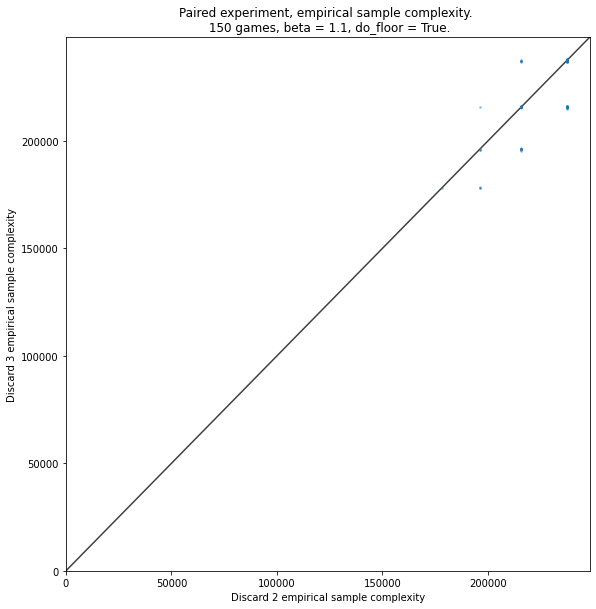

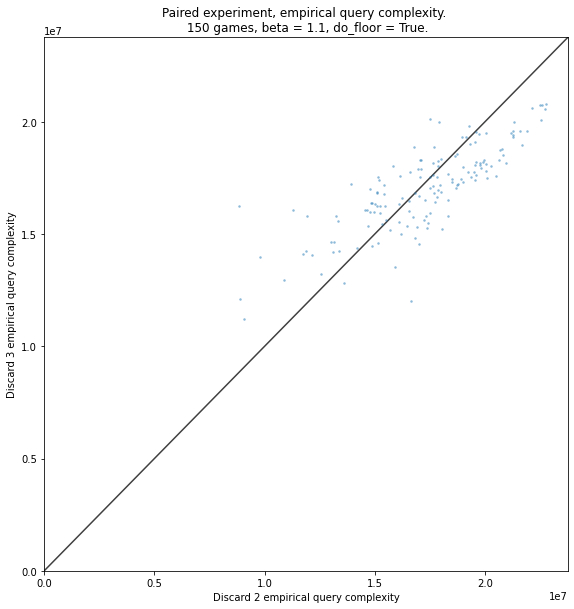

In [435]:
pair_expt_plot_save(plot_stat = 'emp_sample_complexity', beta= beta, do_floor = do_floor)
pair_expt_plot_save(plot_stat = 'emp_simulation_complexity', beta= beta, do_floor = do_floor)